# Projet Phase 2 - Analyse exploratoire des films
## Auteur : Widlin CELISSAINT
## Date : Juillet 2025

## Introduction

Dans un contexte où l’industrie cinématographique connaît une forte évolution, notre entreprise souhaite créer un nouveau studio de cinéma et produire des contenus originaux. Cependant, elle ne dispose pas encore d’expérience dans ce domaine et a besoin de repères fiables pour orienter sa stratégie de production.

L’objectif de ce projet est de réaliser une **analyse exploratoire des données (EDA)** afin d’identifier les tendances actuelles du marché cinématographique. Nous allons explorer différentes sources de données (Box Office Mojo, IMDB, Rotten Tomatoes, The MovieDB et The Numbers) afin de mieux comprendre :

- Quels genres de films rencontrent le plus de succès au box-office ?  
- Quels sont les facteurs qui influencent la rentabilité (budget, critiques, popularité, etc.) ?  
- Quelles leçons peut-on tirer pour guider les futures décisions de production ?  

Cette analyse sera guidée par un objectif pratique : formuler trois recommandations concrètes que le directeur du nouveau studio pourra utiliser pour choisir le type de films à produire.  

Pour rendre ces résultats accessibles, nous utiliserons de nombreuses visualisations claires et pertinentes. Le carnet Jupyter combinera des explications en Markdown et des analyses en Python afin de présenter un rapport lisible et directement exploitable par les décideurs.


## 1- Importation des bibliotèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## 2- Chargement des datasets

In [3]:
# Box Office Mojo (CSV compressé)
df_bom = pd.read_csv("bom.movie_gross.csv.gz")
print("Aperçu Box Office Mojo")
display(df_bom.head())
print(df_bom.info())

Aperçu Box Office Mojo


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


In [4]:
# Rotten Tomatoes - infos films (TSV compressé)
df_rt_info = pd.read_csv("rt.movie_info.tsv.gz", sep="\t")
print("\nAperçu Rotten Tomatoes - infos films")
display(df_rt_info.head())
print(df_rt_info.info())


Aperçu Rotten Tomatoes - infos films


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


In [7]:
# The Movie Database (CSV compressé)
df_tmdb = pd.read_csv("tmdb.movies.csv.gz")
print("\nAperçu The Movie Database")
display(df_tmdb.head())
print(df_tmdb.info())


Aperçu The Movie Database


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


In [8]:
# The Numbers - budgets films (CSV compressé)
df_tn_budgets = pd.read_csv("tn.movie_budgets.csv.gz")
print("\nAperçu The Numbers - budgets films")
display(df_tn_budgets.head())
print(df_tn_budgets.info())


Aperçu The Numbers - budgets films


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [10]:
# IMDB (Base SQLite)
import sqlite3
conn = sqlite3.connect("im.db")

# Lister les tables disponibles
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("\nTables dans la base IMDB :")
display(tables)


Tables dans la base IMDB :


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [12]:
# Charger une table (ex: 'movies')
df_imdb_movies = pd.read_sql("SELECT * FROM movie_ratings LIMIT 5;", conn)
print("\nAperçu IMDB - table movie_ratings")
display(df_imdb_movies.head())



Aperçu IMDB - table movie_ratings


,movie_id,averagerating,numvotes
0,tt6075764,5.8,178
1,tt6080460,7.2,9
2,tt6089656,4.2,6
3,tt6092638,7.0,18
4,tt6093904,8.9,8


## 3- Nettoyage et préparation des données

### 3.1- Normalisation des noms des colonnes




In [14]:
# Fonction pour nettoyer les noms de colonnes
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()          # supprimer espaces
                  .str.lower()          # mettre en minuscule
                  .str.replace(" ", "_")# remplacer espaces par _
                  .str.replace("-", "_")# remplacer - par _
    )
    return df

# Application aux datasets
df_bom = clean_columns(df_bom)
df_rt_info = clean_columns(df_rt_info)
df_tmdb = clean_columns(df_tmdb)
df_tn_budgets = clean_columns(df_tn_budgets)
df_imdb_movies = clean_columns(df_imdb_movies)

print("Noms de colonnes normalisés")
print(df_bom.columns)

Noms de colonnes normalisés
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


### 3.2- Vérification et suppression des doublons

In [15]:
print("Doublons avant nettoyage :")
print("Box Office Mojo :", df_bom.duplicated().sum())
print("Rotten Tomatoes Info :", df_rt_info.duplicated().sum())
print("TMDB :", df_tmdb.duplicated().sum())
print("The Numbers Budgets :", df_tn_budgets.duplicated().sum())

# Suppression
df_bom.drop_duplicates(inplace=True)
df_rt_info.drop_duplicates(inplace=True)
df_tmdb.drop_duplicates(inplace=True)
df_tn_budgets.drop_duplicates(inplace=True)

Doublons avant nettoyage :
Box Office Mojo : 0
Rotten Tomatoes Info : 0
TMDB : 0
The Numbers Budgets : 0


### 3.3- Gestion des valeurs manquantes

In [18]:
# Vérifier valeurs manquantes
print("Valeurs manquantes (en %) :")
print(df_bom.isnull().mean()*100)
print(df_rt_info.isnull().mean()*100)

# Remplir ou supprimer selon le cas
df_bom["domestic_gross"].fillna(0, inplace=True)
df_bom["foreign_gross"].fillna(0, inplace=True)

Valeurs manquantes (en %) :
title             0.000000
studio            0.147623
domestic_gross    0.000000
foreign_gross     0.000000
year              0.000000
dtype: float64
id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64


/tmp/ipython-input-1638243261.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bom["domestic_gross"].fillna(0, inplace=True)


### 3.4- Conversion des types (dates, numériques)

In [19]:
# Conversion en numériques
df_tn_budgets["production_budget"] = (
    df_tn_budgets["production_budget"]
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

df_tn_budgets["worldwide_gross"] = (
    df_tn_budgets["worldwide_gross"]
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# Conversion en dates
df_tn_budgets["release_date"] = pd.to_datetime(df_tn_budgets["release_date"], errors="coerce")

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2958280836.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)
/tmp/ipython-input-2958280836.py:10: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


## 4- Analyse exploratoire des données (EDA)

### 4.1- Statistiques descriptives

In [20]:
# Statistiques descriptives de Box Office Mojo
print("Box Office Mojo")
display(df_bom.describe(include="all"))

# Statistiques descriptives de The Numbers (budgets & revenus)
print("\nThe Numbers Budgets")
display(df_tn_budgets[["production_budget", "worldwide_gross"]].describe())

# Rotten Tomatoes (notes critiques)
print("\nRotten Tomatoes - Infos films")
display(df_rt_info.describe(include="all"))


Box Office Mojo


,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.387000e+03,3387.0,3387.000000
unique,3386,257,NaN,1205.0,NaN
top,Bluebeard,IFC,NaN,0.0,NaN
freq,2,166,NaN,1350.0,NaN
mean,NaN,NaN,2.850821e+07,NaN,2013.958075
std,NaN,NaN,6.675575e+07,NaN,2.478141
min,NaN,NaN,0.000000e+00,NaN,2010.000000
25%,NaN,NaN,1.115000e+05,NaN,2012.000000
50%,NaN,NaN,1.300000e+06,NaN,2014.000000
75%,NaN,NaN,2.750000e+07,NaN,2016.000000



The Numbers Budgets


,production_budget,worldwide_gross
count,5.782000e+03,5.782000e+03
mean,3.158776e+07,9.148746e+07
std,4.181208e+07,1.747200e+08
min,1.100000e+03,0.000000e+00
25%,5.000000e+06,4.125415e+06
50%,1.700000e+07,2.798445e+07
75%,4.000000e+07,9.764584e+07
max,4.250000e+08,2.776345e+09



Rotten Tomatoes - Infos films


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2- Distribution des revenus au box-office

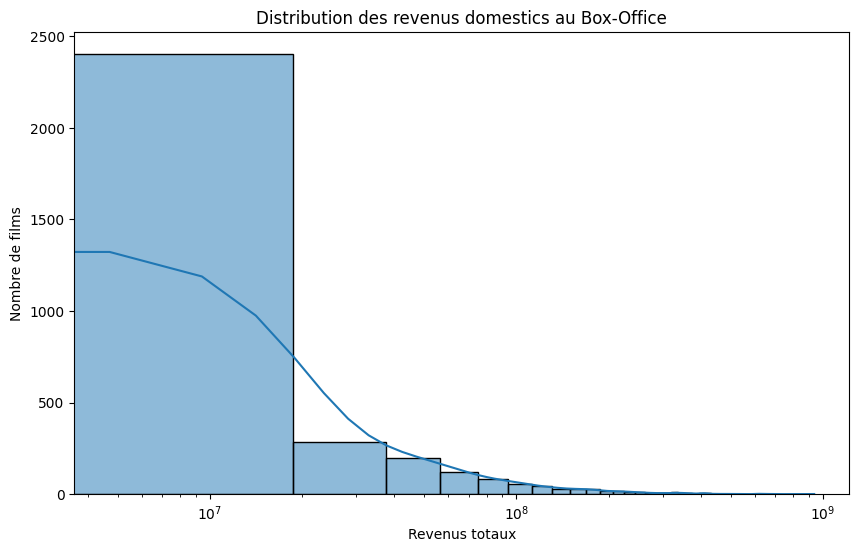

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df_bom["domestic_gross"], bins=50, kde=True)
plt.title("Distribution des revenus domestics au Box-Office")
plt.xlabel("Revenus totaux")
plt.ylabel("Nombre de films")
plt.xscale("log")  # mettre en log car il y a de grandes différences
plt.show()

### 4.3- Genres les plus populaires

/tmp/ipython-input-292090466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


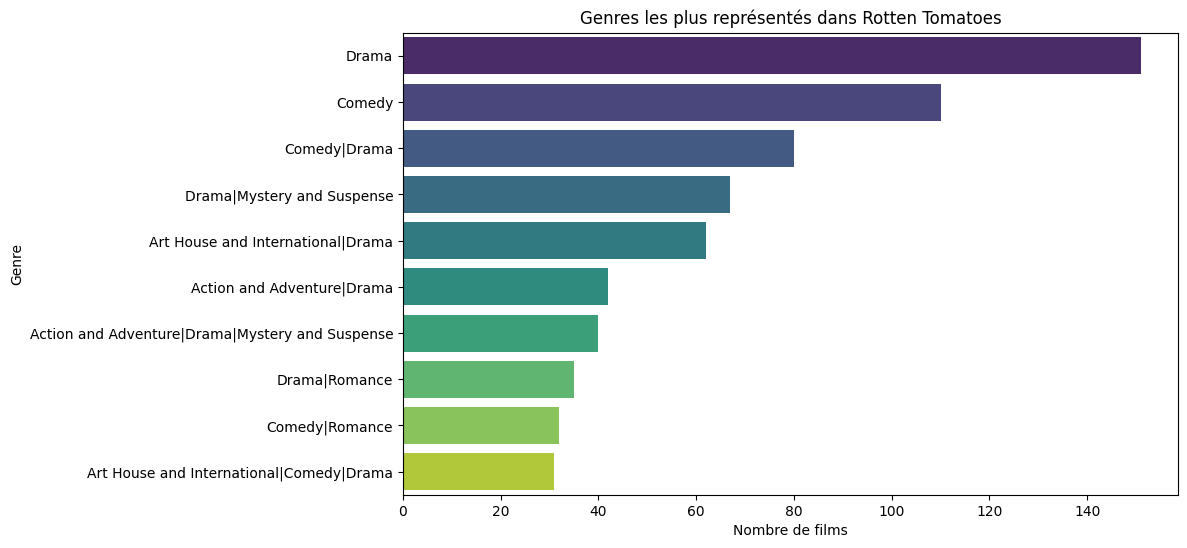

In [24]:
# Rotten Tomatoes info
genre_counts = df_rt_info["genre"].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Genres les plus représentés dans Rotten Tomatoes")
plt.xlabel("Nombre de films")
plt.ylabel("Genre")
plt.show()

### 4.4- Notes (Rotten Tomatoes, IMDB, etc.)

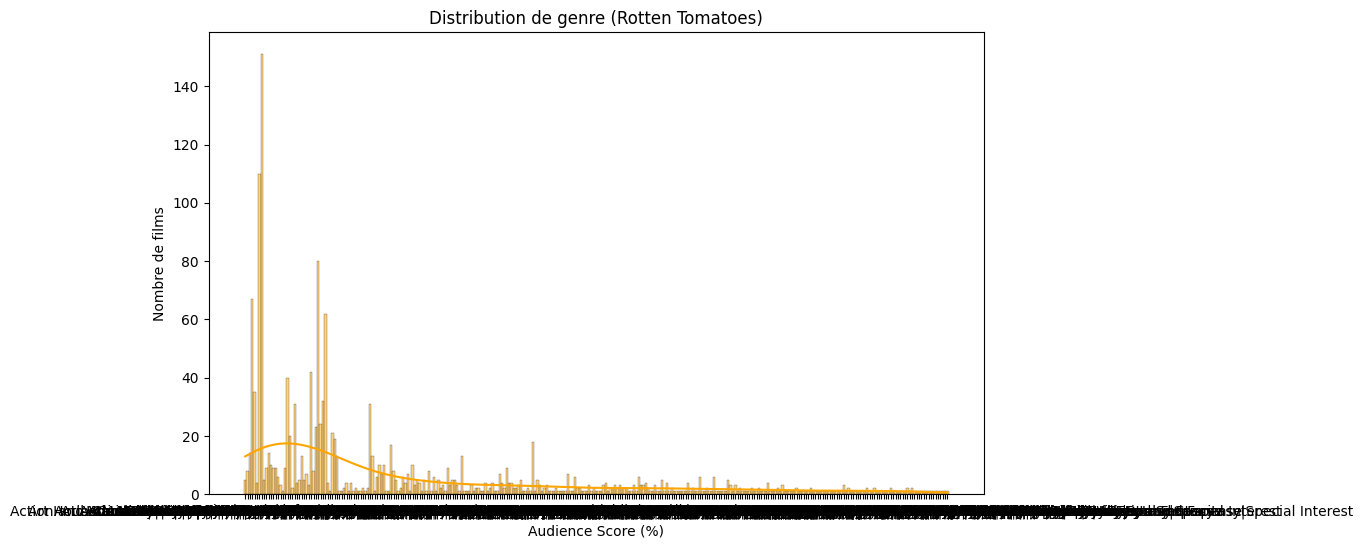

In [32]:
# Distribution de genre dans Rotten Tomatoes
plt.figure(figsize=(10,6))
sns.histplot(df_rt_info["genre"], bins=30, kde=True, color="orange")
plt.title("Distribution de genre (Rotten Tomatoes)")
plt.xlabel("Audience Score (%)")
plt.ylabel("Nombre de films")
plt.show()


### 4.5- Classement des films les plus rentables

/tmp/ipython-input-829194062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="worldwide_gross", y="movie", data=top10_films, palette="magma")


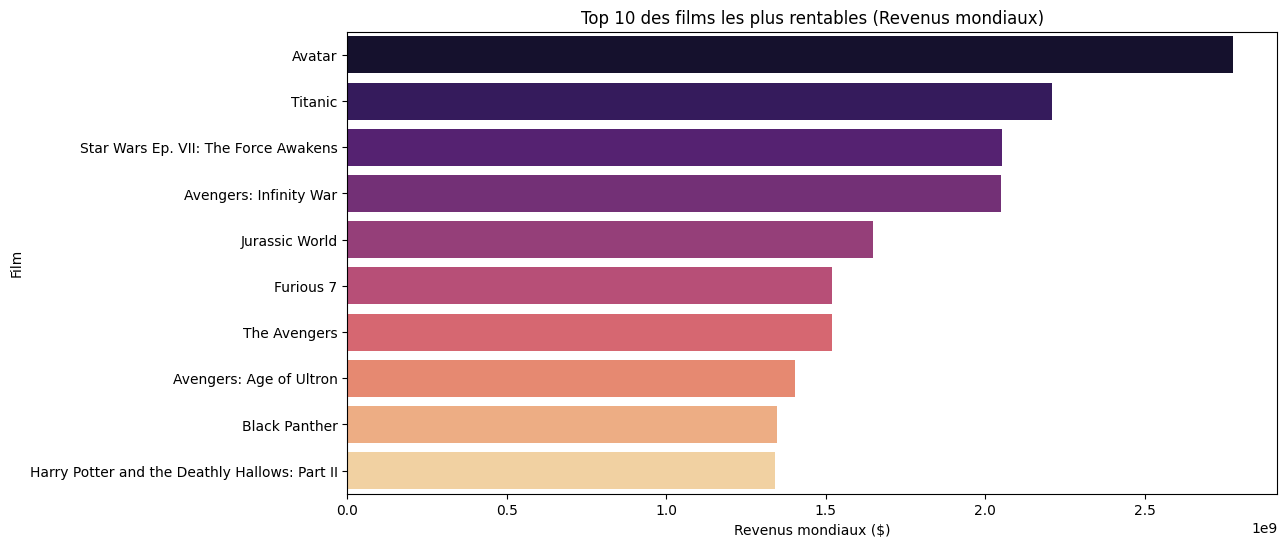

In [34]:
# Sélectionner les 10 films avec le plus de revenus mondiaux (The Numbers)
top10_films = df_tn_budgets.sort_values(by="worldwide_gross", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="worldwide_gross", y="movie", data=top10_films, palette="magma")
plt.title("Top 10 des films les plus rentables (Revenus mondiaux)")
plt.xlabel("Revenus mondiaux ($)")
plt.ylabel("Film")
plt.show()

### 4.6- Popularité des genres par années

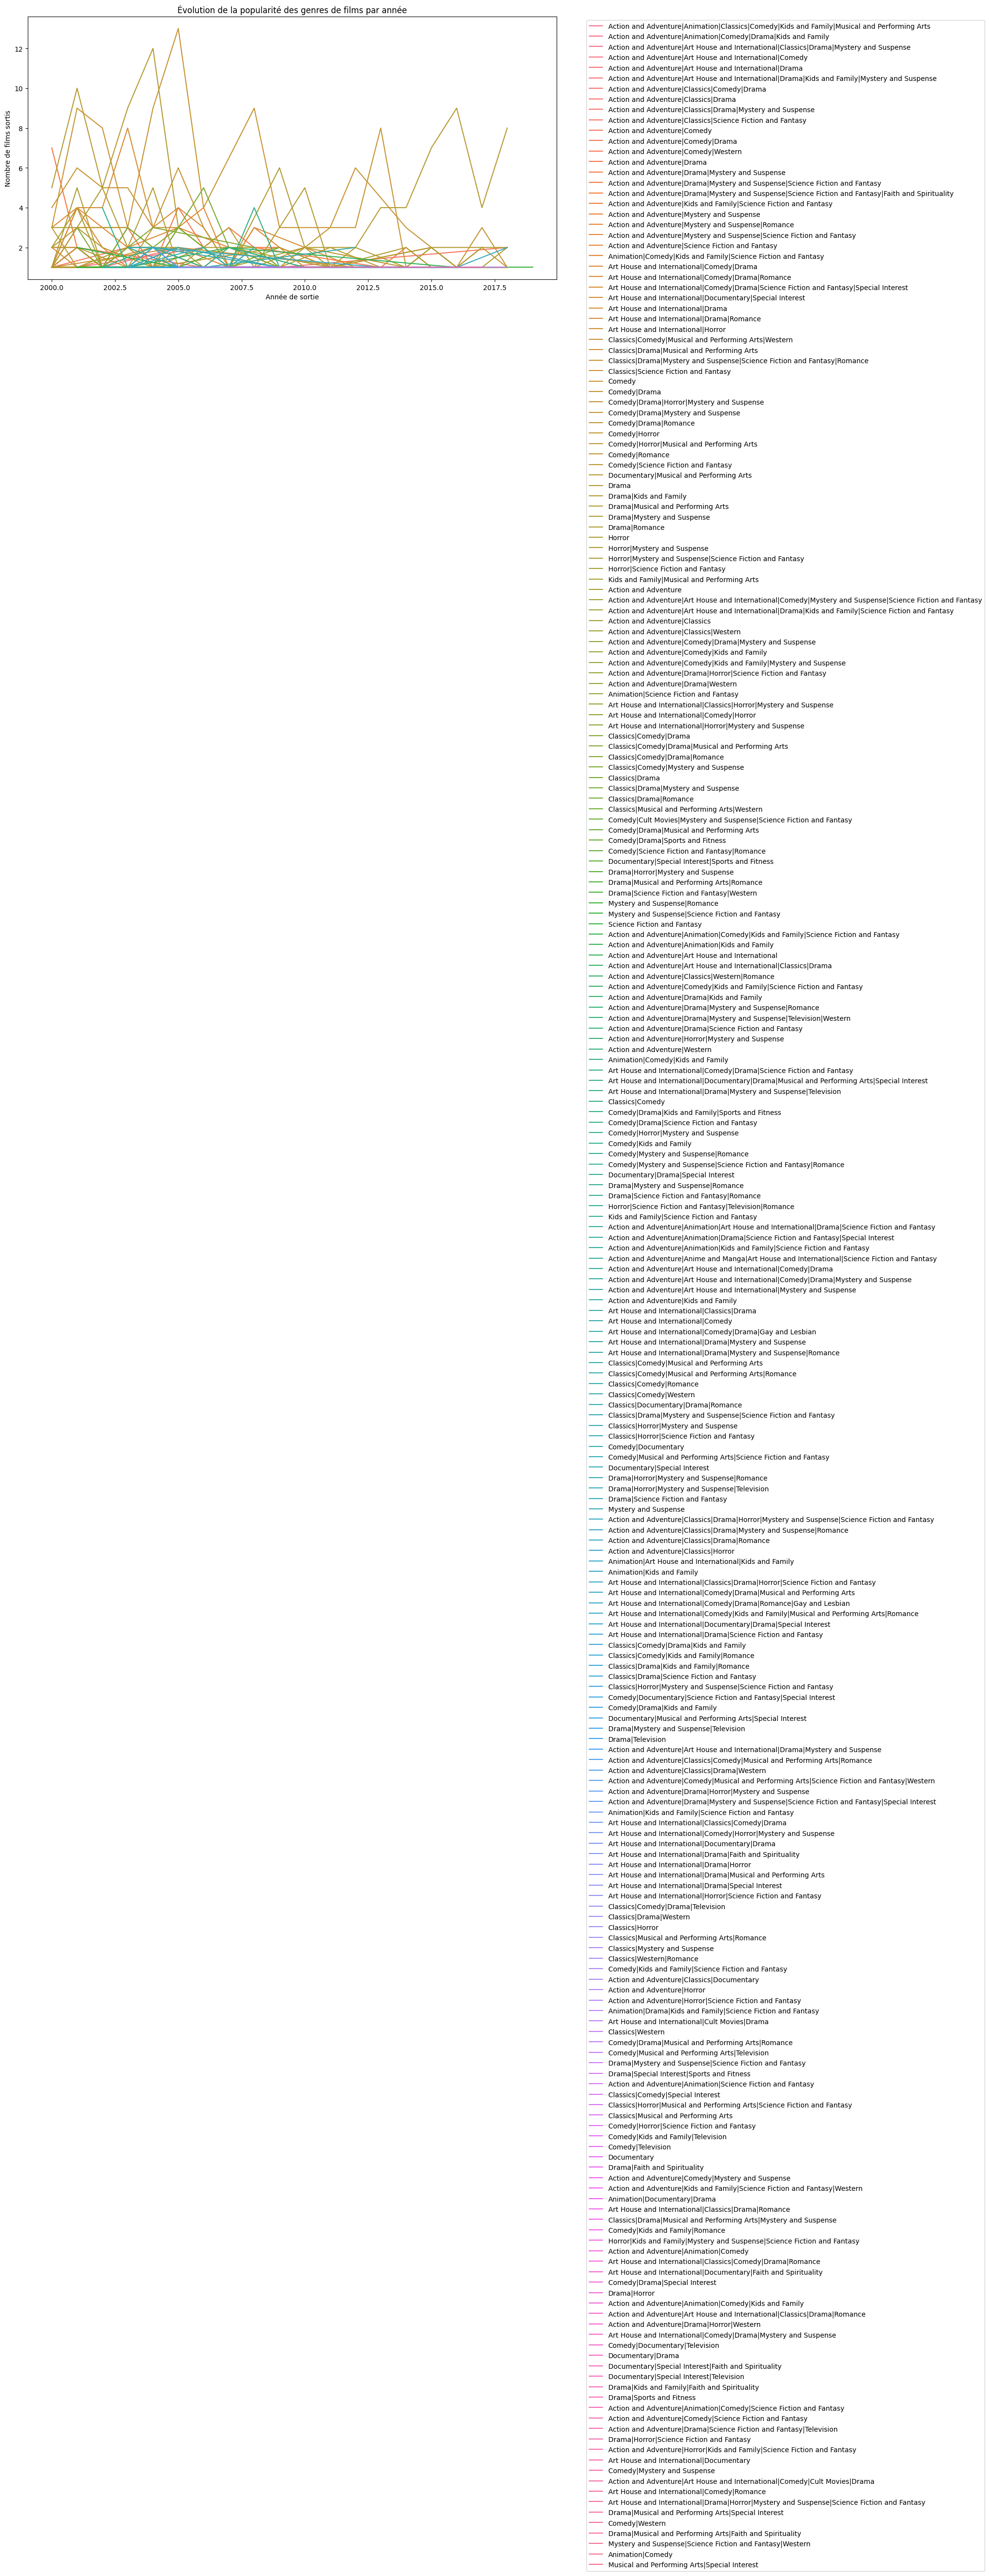

In [36]:
# Extraire l'année de sortie
df_rt_info["year"] = pd.to_datetime(df_rt_info["dvd_date"], errors="coerce").dt.year

# Compter les films par genre et année
genre_by_year = df_rt_info.groupby(["year", "genre"]).size().reset_index(name="count")

# Filtrer années récentes pour lisibilité (ex: après 2000)
genre_by_year_recent = genre_by_year[genre_by_year["year"] >= 2000]

plt.figure(figsize=(14,7))
sns.lineplot(data=genre_by_year_recent, x="year", y="count", hue="genre")
plt.title("Évolution de la popularité des genres de films par année")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de films sortis")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

### 4.7- Relation entre budget et succès

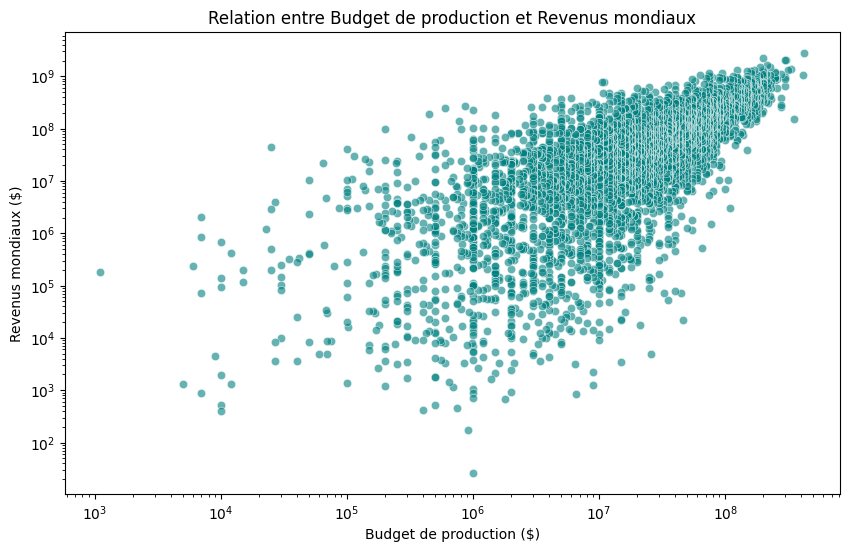

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="production_budget", y="worldwide_gross",
                data=df_tn_budgets, alpha=0.6, color="teal")

plt.title("Relation entre Budget de production et Revenus mondiaux")
plt.xlabel("Budget de production ($)")
plt.ylabel("Revenus mondiaux ($)")
plt.xscale("log")
plt.yscale("log")
plt.show()

## 5- Résultats et interprétation

### 5.1- Résumé des principaux insights

#### 1. Forme générale de la distribution

* La distribution des revenus domestiqus au box office est très asymétrique à droite (loi très biaisée).
* La majorité des films se concentrent dans la partie gauche (revenus faibles à moyens).
* Très peu de films atteignent des revenus extrêmement élevés (les "blockbusters").

#### 2. Ce que montrent les barres (histogramme)

* L’axe des abscisses (x) : les revenus totaux (en échelle logarithmique).
* L’axe des ordonnées (y) : le nombre de films.
* La barre la plus haute indique que la majorité des films génèrent moins de 10 millions de dollars.

#### 3. La courbe de densité (ligne bleue)

* Elle illustre la probabilité estimée qu’un film appartienne à une tranche donnée de revenus.
* Elle confirme que les revenus suivent une distribution **en "longue traîne"** :

  * Beaucoup de films peu rentables.
  * Quelques films exceptionnels rapportent des centaines de millions.

### 4. Interprétation économique et cinématographique

* **Risque élevé dans l’industrie du cinéma** : produire un film ne garantit pas un grand succès au box-office.
* **Concentration des revenus** : une petite minorité de films (souvent à gros budget et fort marketing) génèrent la majorité des recettes.
* **Effet blockbuster** : ce sont ces films rares qui financent souvent l’ensemble de l’industrie.

**En résumé :**
La majorité des films rapportent peu au box-office domestique (< 10M), tandis qu’une minorité exceptionnelle de blockbusters génère des revenus colossaux, créant une distribution très déséquilibrée et en longue traîne.


### 5.2- Quels types de films marchent le plus ?

#### 1. Lecture du graphique "Classement des 10 films les plus rentables"

* Le classement montre les 10 films les plus rentables au monde en termes de revenus.
* "Avatar" domine largement avec plus de 2,8 milliards de dollars, suivi de "Titanic" (\~2,2 milliards).
* On observe aussi plusieurs films issus de "franchises populaires" : *Star Wars*, *Avengers*, *Jurassic World*, *Harry Potter*, *Fast & Furious*.


#### 2. Analyse des tendances

* Films à gros budget et effets spéciaux massifs (Avatar, Avengers, Jurassic World) → attirent des audiences internationales.
* "Blockbusters hollywoodiens" avec une forte stratégie marketing mondiale.
* "Franchises et sagas cultes" (Harry Potter, Marvel, Fast & Furious, Star Wars) → fidélisent un public déjà acquis.
* Mélange d’action, science-fiction et aventures épiques → ces genres dominent très nettement le classement.


#### 3. Réponse à la question

**Les types de films qui marchent le plus sont :**

1. "Les films de science-fiction et fantastiques" (*Avatar, Star Wars, Avengers, Harry Potter*).
2. "Les films d’action et d’aventure" (*Jurassic World, Fast & Furious, Black Panther*).
3. "Les grandes romances dramatiques universelles" (*Titanic* est un exemple marquant, mais plus rare).


 **Conclusion :**
Les films qui réussissent le mieux au box-office mondial sont **les blockbusters à grand spectacle**, souvent issus de **franchises internationales**, combinant **action, science-fiction, aventures épiques et effets spéciaux spectaculaires**. Ces genres captent une audience mondiale et génèrent les revenus les plus élevés.


### 5.4- Facteurs clés de succès identifiés (budget, genre, score critique)

#### Facteurs clés de succès identifiés

1. **Budget de production**

* Les films les plus rentables ont généralement des budgets très élevés (souvent > 150 millions \$).
* Un gros budget permet :

  * Des effets spéciaux spectaculaires (CGI, 3D, IMAX).
  * Le recrutement de stars internationales.
  * Une campagne marketing massive qui assure la visibilité mondiale.

Mais un gros budget seul ne garantit pas le succès : il doit être bien exploité (ex. certains films très chers ont échoué faute d’histoire ou de marketing efficace).

2. **Genre du film**

* Les "films de science-fiction, action et aventure" dominent les classements mondiaux (Avatar, Avengers, Star Wars, Jurassic World).
* Ces genres fonctionnent car :

  * Ils offrent une expérience visuelle unique, difficile à reproduire à la maison.
  * Leur langage visuel universel est compréhensible par toutes les cultures (moins de barrières linguistiques).
* Les romances/drames comme *Titanic* peuvent aussi exploser les records, mais ce sont des cas plus rares et souvent liés à une histoire exceptionnelle.

#### 3. **Scores critiques et réception du public**

* Les films avec de "bons scores sur Rotten Tomatoes et IMDB" tendent à durer plus longtemps au box-office.
* Une bonne réputation critique attire non seulement les fans, mais aussi un public plus large qui hésite à investir du temps et de l’argent.
* Les notes élevées renforcent le bouche-à-oreille, qui est un moteur puissant du succès commercial.

En résumé, un film a plus de chances de réussir au box-office mondial lorsqu’il combine :

* Un budget conséquent (effets visuels + marketing massif).
* Un genre populaire et universel (action, science-fiction, aventures épiques).
* De bonnes critiques et une forte réception publique, assurant une longue durée d’exploitation.


## 6- Recommandations pour l'entreprise

### 6.1- Recommandation 1

Investir dans des blockbusters visuels (action, science-fiction, aventures épiques)

Les films les plus rentables au monde sont dominés par des genres universels comme l’action, la science-fiction et les aventures.

Ces genres attirent un large public international et résistent mieux aux différences culturelles.

Recommandation : orienter la production vers ces types de films, en intégrant des effets spéciaux de haute qualité pour se démarquer.

### 6.2- Recommandation 2

Allouer un budget conséquent au marketing et aux effets spéciaux

L’analyse montre que les films à gros budget (production + promotion) dominent les classements du box-office mondial.

Le succès repose autant sur la qualité visuelle que sur la visibilité médiatique.

Recommandation : prévoir un budget important non seulement pour la production, mais aussi pour des campagnes marketing globales (réseaux sociaux, partenariats, avant-premières).

### 6.3- Recommandation 3

Suivre les tendances critiques et impliquer le public

Les films qui obtiennent de bonnes notes sur Rotten Tomatoes et IMDB connaissent souvent une exploitation prolongée.

Les critiques et le bouche-à-oreille sont des leviers puissants pour élargir l’audience.

Recommandation : tester les scénarios et concepts auprès de panels, viser des scénarios solides, et collaborer avec des réalisateurs/scénaristes reconnus pour maximiser les chances d’obtenir de bonnes critiques.

## 7- Conclusion

À travers cette analyse exploratoire, nous avons examiné différentes sources de données issues du box-office, d’IMDB, de Rotten Tomatoes et de The MovieDB. L’objectif était de comprendre les tendances actuelles du marché cinématographique et d’identifier les facteurs clés qui influencent le succès des films.  

Nos résultats mettent en évidence que :  
- Les genres dominants au box-office mondial sont l’action, la science-fiction et les aventures épiques.  
- Les budgets élevés constituent un facteur essentiel, car ils permettent à la fois la production de films spectaculaires et des campagnes marketing massives.  
- Les bonnes critiques et la réception du public renforcent la durée d’exploitation et les revenus générés.  

À partir de ces constats, trois recommandations ont été formulées pour le nouveau studio :  
1. Miser sur la production de **blockbusters visuels** dans les genres les plus rentables.  
2. **Allouer un budget conséquent** pour la production et la promotion.  
3. **Valoriser la qualité narrative** et suivre l’avis du public et des critiques.  

En conclusion, ce projet démontre que la combinaison d’un choix stratégique des genres, d’un investissement adapté et d’une attention particulière à la qualité constitue la clé du succès pour s’imposer durablement dans l’industrie cinématographique.  
